# Natural Language Processing With Python's NLTK Package

Credit: https://realpython.com/nltk-nlp-python/


In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.6 [780 kB]
Fetched 780 kB in 1s (1,015 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 128215 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.6_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.6) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.6) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.8.10-0ubuntu1~20.04).
The following additional packages will be

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Sentence & Word tokenization

In [3]:
example_string = """Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,and how many more believe learning to be difficult.
"""

## Split up the "example_string" into sentences:

In [4]:
sent_tokenize(example_string)

["Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,and how many more believe learning to be difficult."]

#### Tokenizing **example_string** by sentence gives you a list of three strings that are sentences:

## Tokenizing "example_string" by word:

In [5]:
words = word_tokenize(example_string)
words

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

In [6]:
length = len(words)
length

53

## Filter Stop Words

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [9]:
word_in_quote = word_tokenize(worf_quote)
word_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

### Create a set of stop words, focus on stop words in "english":

In [10]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### empty list to hold the words that make it past the filter:

In [11]:
filtered_list = []

#### hold all the words in **words_in_quote** that aren’t stop words. 

In [12]:
for word in word_in_quote:
  # print(word)
  if word.casefold() not in stop_words:     # ignore whether the letters in word were uppercase or lowercase.
    # print(word.casefold)
    filtered_list.append(word)

filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

#### A **list comprehension** to make a list of all the words in your text that aren’t stop words:

When you use a **list comprehension**, you don’t *create an empty list and then add items to the end of it*. Instead, you define the list and its
contents at the same time. Using a **list comprehension** is often seen as 
more Pythonic.

In [13]:
filtered_list = [
  word for word in word_in_quote if word.casefold() not in stop_words
]
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

# Stemming
#### Stemming is a text processing task in which you reduce words to their root, which is the core part of a word.

In [14]:
from nltk.stem import PorterStemmer

### create a **stemmer** with PorterStemmer():

In [15]:
stemmer = PorterStemmer()

In [16]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [17]:
words = word_tokenize(string_for_stemming)
words


['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [18]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

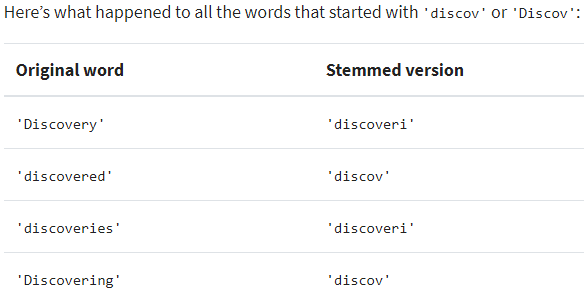
### **Understemming** and **overstemming** are two ways stemming can go wrong:

**Understemming** happens when two related words should be reduced to the same stem but aren’t. This is a **false negative**.

**Overstemming** happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a **false positive**.

## Tagging Parts of Speech
**Part of speech** is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or **POS** tagging, is the task of labeling the words in your text according to their part of speech.
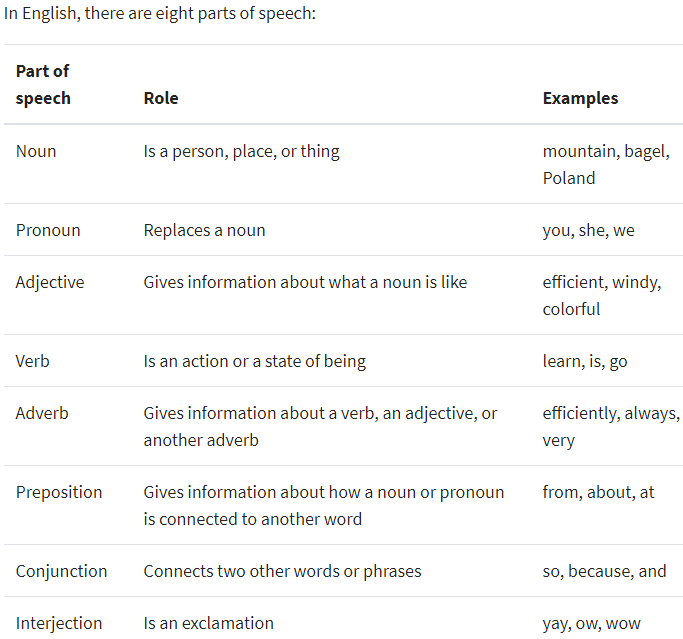

In [19]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [20]:
words_in_sagan_quote = word_tokenize(sagan_quote)
words_in_sagan_quote

['If',
 'you',
 'wish',
 'to',
 'make',
 'an',
 'apple',
 'pie',
 'from',
 'scratch',
 ',',
 'you',
 'must',
 'first',
 'invent',
 'the',
 'universe',
 '.']

In [21]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate **tuple**, with a tag that represents their **part of speech (pos)**. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [22]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


But how would **NLTK** handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

Make a string to hold an excerpt from this poem:

In [23]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

In [24]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

## Lemmatizing
Now that you’re up to speed on parts of speech, you can circle back to **lemmatizing**. Like **stemming, lemmatizing** reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like ***'discoveri'.***
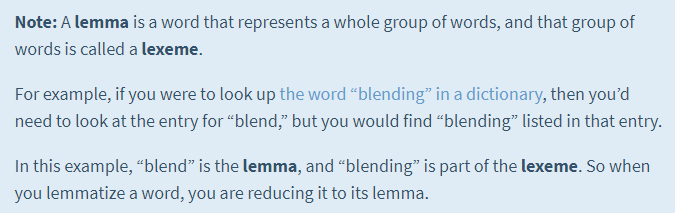

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

#### Let’s start with lemmatizing a plural noun:
https://www.ef.com/wwen/english-resources/english-grammar/singular-and-plural-nouns/
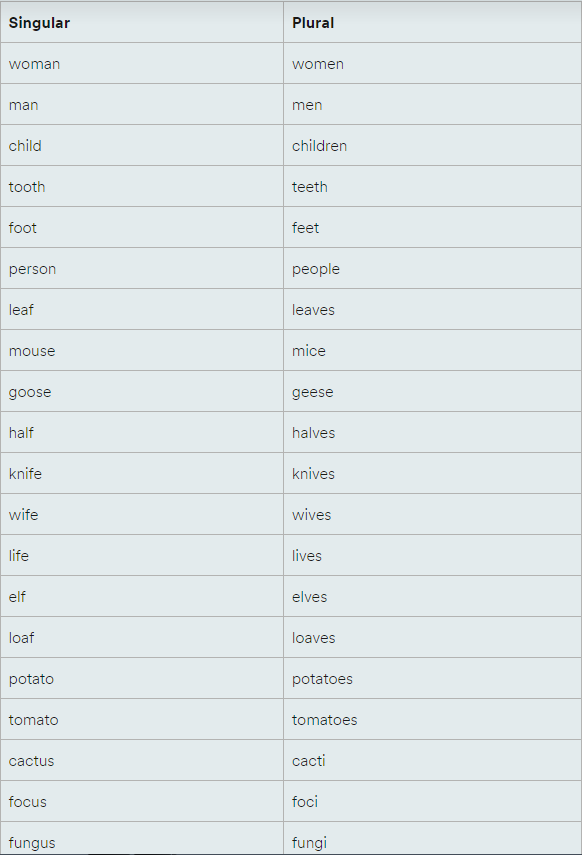

In [27]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
lemmatizer.lemmatize('women')

'woman'

In [29]:
lemmatizer.lemmatize('wives')

'wife'

In [30]:
string_for_lemmatizing = "The friends of DeSoto love scarves. Fungi, foci, cacti, tomatoes"
words = word_tokenize(string_for_lemmatizing)
words

['The',
 'friends',
 'of',
 'DeSoto',
 'love',
 'scarves',
 '.',
 'Fungi',
 ',',
 'foci',
 ',',
 'cacti',
 ',',
 'tomatoes']

### lemmatize the string, with list comprehensive

In [31]:
lemmatized = [lemmatizer.lemmatize(word) for word in words]
lemmatized

['The',
 'friend',
 'of',
 'DeSoto',
 'love',
 'scarf',
 '.',
 'Fungi',
 ',',
 'focus',
 ',',
 'cactus',
 ',',
 'tomato']

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [32]:
lemmatizer.lemmatize('worst')

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [33]:
lemmatizer.lemmatize('worst', pos='a')

'bad'

The default parameter for **pos is 'n'** for noun, but you made sure that **"worst"** was treated as an **adjective** by adding the parameter **pos="a"**. As a result, you got **'bad'**, which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because **"worst"** is the **superlative** form of the adjective **'bad'**, and lemmatizing reduces **superlatives** as well as comparatives to their lemmas.

##Chunking
While tokenizing allows you to identify words and sentences, **chunking** allows you to identify **phrases**.
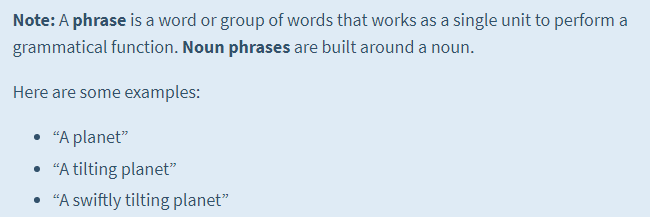

**Chunking** makes use of **POS tags** to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

Here’s how to import the relevant parts of NLTK in order to chunk:

In [34]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [35]:
words_in_lotr = word_tokenize(lotr_quote)
words_in_lotr

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

### tag the words by **part of speech (POS)**:

In [36]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
lotr_pos_tags = nltk.pos_tag(words_in_lotr)
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

## define a chunk grammar
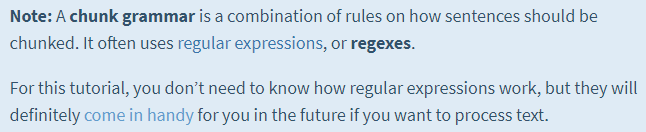

### Create a chunk grammar with one regular expression rule:

In [38]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

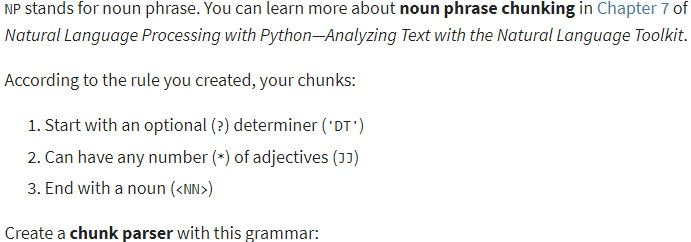

https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable

In [39]:
chunk_parser = nltk.RegexpParser(grammar)
chunk_parser

<chunk.RegexpParser with 1 stages>

In [40]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 2.9 MB/s eta 0:00:00


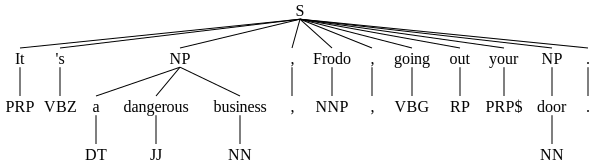

In [41]:
tree = chunk_parser.parse(lotr_pos_tags)
# tree.draw()
tree

## Chinking
Chinking is used together with chunking, but while **chunking** is used to include a pattern, **chinking** is used to exclude a pattern.

Let’s reuse the quote you used in the section on chunking. You already have a list of tuples containing each of the words in the quote along with its part of speech tag:

In [42]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

In [43]:
grammar = """
... Chunk: {<.*>+}
...        }<JJ>{"""

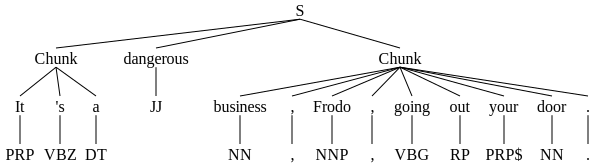

In [44]:
from nltk import parse
parser = nltk.RegexpParser(grammar)
tree = parser.parse(lotr_pos_tags)
tree

## Using Named Entity Recognition (NER)
Named entities are **noun phrases** that refer to specific locations, people, organizations, and so on. With **named entity recognition**, you can find the named entities in your texts and also determine what kind of **named entity** they are.
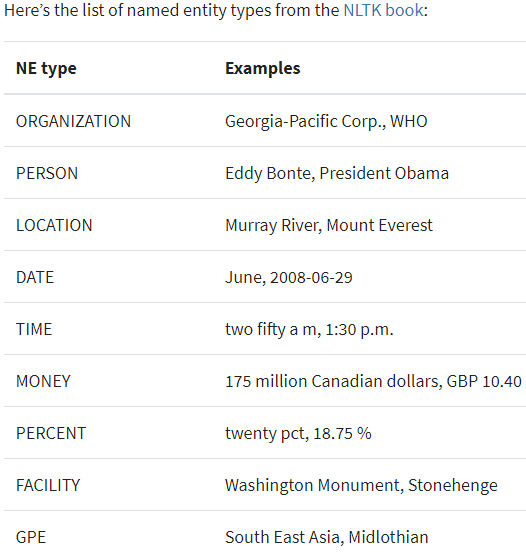

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


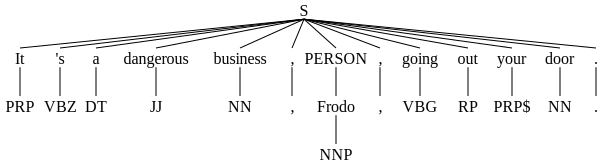

In [45]:
nltk.download("maxent_ne_chunker")
nltk.download('words')
tree = nltk.ne_chunk(lotr_pos_tags)
tree.draw
tree

Because you included **`binary=True`**, the named entities you’ll get won’t be labeled more specifically. You’ll just know that they’re named entities.

In [46]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree.draw


<bound method Tree.draw of Tree('S', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), Tree('NE', [('Frodo', 'NNP')]), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])>

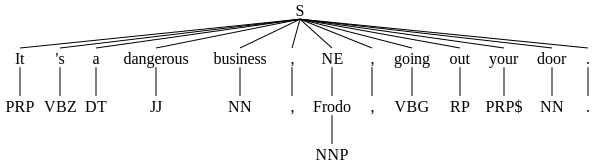

In [47]:
tree

### extract named entities directly from your text.

In [48]:
quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""
ne_list = []
def extract_ne(paragraph):
  words = word_tokenize(quote)
  pos_tags = nltk.pos_tag(words)
  ne_tree = nltk.ne_chunk(pos_tags, binary=True)

  # ne_list = []
  # for t in tree:
  #   if (hasattr(t, 'label') and t.label() == "NE"):
  #     for i in t:
  #       ne_list.append(i[0])

  # let's do list comprehension of above source code
  # Both the lines of codes are correct.
  #return set(" ".join(i[0] for i in t) for t in ne_tree if hasattr(t, 'label') and t.label() == "NE")
  ne_list = [" ".join(i[0] for i in t) for t in ne_tree if hasattr(t, 'label') and t.label() == "NE"]
  return ne_list

In [49]:
extract_ne(quote)

['Schiaparelli', 'Mars', 'Lick Observatory', 'Perrotin', 'Nature']

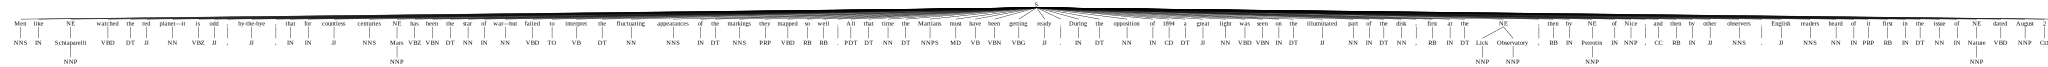

In [50]:
words = word_tokenize(quote)
pos_tags = nltk.pos_tag(words)
ne_tree = nltk.ne_chunk(pos_tags, binary=True)

ne_list = []
for t in ne_tree:
  if (hasattr(t, 'label') and t.label() == "NE"):
    for i in t:
      ne_list.append(i[0])

ne_tree # tree map

In [51]:
ne_list

['Schiaparelli', 'Mars', 'Lick', 'Observatory', 'Perrotin', 'Nature']

In [52]:
ne_tree.draw

<bound method Tree.draw of Tree('S', [('Men', 'NNS'), ('like', 'IN'), Tree('NE', [('Schiaparelli', 'NNP')]), ('watched', 'VBD'), ('the', 'DT'), ('red', 'JJ'), ('planet—it', 'NN'), ('is', 'VBZ'), ('odd', 'JJ'), (',', ','), ('by-the-bye', 'JJ'), (',', ','), ('that', 'IN'), ('for', 'IN'), ('countless', 'JJ'), ('centuries', 'NNS'), Tree('NE', [('Mars', 'NNP')]), ('has', 'VBZ'), ('been', 'VBN'), ('the', 'DT'), ('star', 'NN'), ('of', 'IN'), ('war—but', 'NN'), ('failed', 'VBD'), ('to', 'TO'), ('interpret', 'VB'), ('the', 'DT'), ('fluctuating', 'NN'), ('appearances', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('markings', 'NNS'), ('they', 'PRP'), ('mapped', 'VBD'), ('so', 'RB'), ('well', 'RB'), ('.', '.'), ('All', 'PDT'), ('that', 'DT'), ('time', 'NN'), ('the', 'DT'), ('Martians', 'NNPS'), ('must', 'MD'), ('have', 'VB'), ('been', 'VBN'), ('getting', 'VBG'), ('ready', 'JJ'), ('.', '.'), ('During', 'IN'), ('the', 'DT'), ('opposition', 'NN'), ('of', 'IN'), ('1894', 'CD'), ('a', 'DT'), ('great', 'JJ'), 

## Getting Text to Analyze
Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a **corpus**. NLTK provides several **corpora** covering everything from novels hosted by [Project Gutenberg](https://www.gutenberg.org/) to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires **nltk.download("book")**, which is a pretty big download:

In [53]:
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Using a Concordance
When you use a **concordance**, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

Let’s see what these good people looking for love have to say! The personals corpus is called **text8**, so we’re going to call **.concordance**() on it with the parameter **"man"**:

In [54]:
text8.concordance('man')

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [55]:
text8.concordance('woman')

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


## Making a Dispersion Plot
You can use a **dispersion plot** to see how much a particular word appears and where it appears. So far, we’ve looked for **"man"** and **"woman"**, but it would be interesting to see how much those words are used compared to their synonyms:

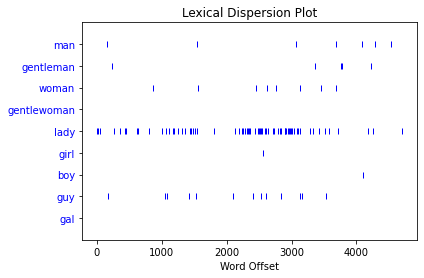

In [56]:
text8.dispersion_plot(['man','gentleman','woman','gentlewoman','lady','girl','boy','guy','gal'])

**dispersion plot** for ***Sense and Sensibility***, which is **text2**. Jane Austen novels talk a lot about people’s homes, so make a **dispersion plot** with the names of a few homes:

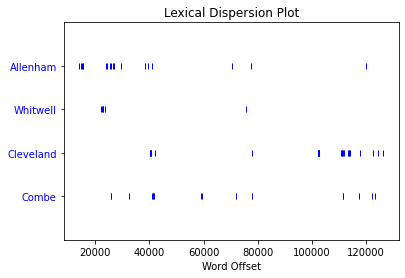

In [57]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

## Making a Frequency Distribution
With a **frequency distribution**, you can check which words show up most frequently in your text. You’ll need to get started with an import:

In [58]:
from nltk import FreqDist
freq_dist = FreqDist(text8)
freq_dist

FreqDist({',': 539, '.': 353, '/': 110, 'for': 99, 'and': 74, 'to': 74, 'lady': 68, '-': 66, 'seeks': 60, 'a': 52, ...})

In [59]:
freq_dist.max

<bound method FreqDist.max of FreqDist({',': 539, '.': 353, '/': 110, 'for': 99, 'and': 74, 'to': 74, 'lady': 68, '-': 66, 'seeks': 60, 'a': 52, ...})>

In [60]:
freq_dist.max()

','

In [61]:
freq_dist.most_common

<bound method Counter.most_common of FreqDist({',': 539, '.': 353, '/': 110, 'for': 99, 'and': 74, 'to': 74, 'lady': 68, '-': 66, 'seeks': 60, 'a': 52, ...})>

In [62]:
freq_dist.most_common()

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26),
 ('s', 24),
 ('y', 23),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('I', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('out', 19),
 ('rship', 18),
 ('looking', 18),
 ('like', 18),
 ('age', 17),
 ('attractive', 17),
 ('who', 17),
 ('friendship', 17),
 ('40', 16),
 ('45', 16),
 ('35', 16),
 ('Looking', 16),
 ('5', 16),
 ('MALE', 15),
 ('times', 15),
 ('male', 15),
 ('meet', 15),
 ('life', 15),
 ('seeking', 14),
 ('r', 14),
 ('open', 14),
 ('the', 14),
 ('female', 14),
 ('of', 14),
 ('GSOH', 14),
 ('enjoy', 14),
 ("''", 14),
 ('fit', 14),
 ('or', 13),
 ('LADY', 13),
 ('guy', 13),
 ('no', 13),
 ('be', 13),
 ('music', 13),
 ('ft', 13),
 ('drinker', 13),
 ('30', 13),
 ('f', 13),
 ('tall

In [63]:
freq_dist.most_common(15)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29)]

Create a list of all of the words in **text8** without stop words:

In [64]:
meaningful_words = [word for word in text8 if word.casefold not in stop_words]
meaningful_words

['25',
 'SEXY',
 'MALE',
 ',',
 'seeks',
 'attrac',
 'older',
 'single',
 'lady',
 ',',
 'for',
 'discreet',
 'encounters',
 '.',
 '35YO',
 'Security',
 'Guard',
 ',',
 'seeking',
 'lady',
 'in',
 'uniform',
 'for',
 'fun',
 'times',
 '.',
 '40',
 'yo',
 'SINGLE',
 'DAD',
 ',',
 'sincere',
 'friendly',
 'DTE',
 'seeks',
 'r',
 '/',
 'ship',
 'with',
 'fem',
 'age',
 'open',
 'S',
 '/',
 'E',
 '44yo',
 'tall',
 'seeks',
 'working',
 'single',
 'mum',
 'or',
 'lady',
 'below',
 '45',
 'fship',
 'rship',
 '.',
 'Nat',
 'Open',
 '6',
 '.',
 '2',
 '35',
 'yr',
 'old',
 'OUTGOING',
 'M',
 'seeks',
 'fem',
 '28',
 '-',
 '35',
 'for',
 'o',
 '/',
 'door',
 'sports',
 '-',
 'w',
 '/',
 'e',
 'away',
 'A',
 'professional',
 'business',
 'male',
 ',',
 'late',
 '40s',
 ',',
 '6',
 'feet',
 'tall',
 ',',
 'slim',
 'build',
 ',',
 'well',
 'groomed',
 ',',
 'great',
 'personality',
 ',',
 'home',
 'owner',
 ',',
 'interests',
 'include',
 'the',
 'arts',
 'travel',
 'and',
 'all',
 'things',
 'good

In [65]:
freq_dist_meaningful_words = FreqDist(meaningful_words)
freq_dist_meaningful_words

FreqDist({',': 539, '.': 353, '/': 110, 'for': 99, 'and': 74, 'to': 74, 'lady': 68, '-': 66, 'seeks': 60, 'a': 52, ...})

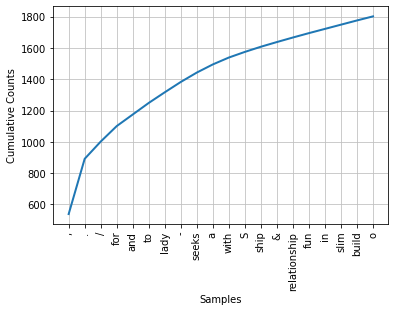

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [66]:
freq_dist_meaningful_words.plot(20, cumulative=True)

## Finding Collocations
A **collocation** is a sequence of words that shows up often. If you’re interested in common collocations in English, then you can check out *The BBI Dictionary of English Word Combinations*. It’s a handy reference you can use to help you make sure your writing is idiomatic. Here are some examples of collocations that use the word **“tree”**:

1. Syntax tree
2. Family tree
3. Decision tree

To see pairs of words that come up often in your corpus, you need to call **.collocations()** on it:

In [67]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


lemmatized versions of all the words in text8:

In [68]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]
lemmatized_words

['25',
 'SEXY',
 'MALE',
 ',',
 'seek',
 'attrac',
 'older',
 'single',
 'lady',
 ',',
 'for',
 'discreet',
 'encounter',
 '.',
 '35YO',
 'Security',
 'Guard',
 ',',
 'seeking',
 'lady',
 'in',
 'uniform',
 'for',
 'fun',
 'time',
 '.',
 '40',
 'yo',
 'SINGLE',
 'DAD',
 ',',
 'sincere',
 'friendly',
 'DTE',
 'seek',
 'r',
 '/',
 'ship',
 'with',
 'fem',
 'age',
 'open',
 'S',
 '/',
 'E',
 '44yo',
 'tall',
 'seek',
 'working',
 'single',
 'mum',
 'or',
 'lady',
 'below',
 '45',
 'fship',
 'rship',
 '.',
 'Nat',
 'Open',
 '6',
 '.',
 '2',
 '35',
 'yr',
 'old',
 'OUTGOING',
 'M',
 'seek',
 'fem',
 '28',
 '-',
 '35',
 'for',
 'o',
 '/',
 'door',
 'sport',
 '-',
 'w',
 '/',
 'e',
 'away',
 'A',
 'professional',
 'business',
 'male',
 ',',
 'late',
 '40',
 ',',
 '6',
 'foot',
 'tall',
 ',',
 'slim',
 'build',
 ',',
 'well',
 'groomed',
 ',',
 'great',
 'personality',
 ',',
 'home',
 'owner',
 ',',
 'interest',
 'include',
 'the',
 'art',
 'travel',
 'and',
 'all',
 'thing',
 'good',
 ',',
 '

For "linguistic" processing tasks we can make use of an NLTK text with this list:
</br>
### an **NLTK text** with this list:

In [69]:
new_text = nltk.Text(lemmatized_words)
new_text

<Text: 25 SEXY MALE , seek attrac older single...>

In [70]:
new_text.collocations(15)

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented
